<a href="https://colab.research.google.com/github/BDouchet/SDATA/blob/main/TP_trees.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Import & load

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials

auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

id='1FIIo3FFl9VTavlLfk1c_OAyF00eOZ336'

downloaded = drive.CreateFile({'id':id})
downloaded.GetContentFile('iris.csv')

In [ ]:
df=pd.read_csv('iris.csv')
print(df.dtypes)
df

sepal.length    float64
sepal.width     float64
petal.length    float64
petal.width     float64
variety          object
dtype: object


,sepal.length,sepal.width,petal.length,petal.width,variety
0,5.1,3.5,1.4,0.2,Setosa
1,4.9,3.0,1.4,0.2,Setosa
2,4.7,3.2,1.3,0.2,Setosa
3,4.6,3.1,1.5,0.2,Setosa
4,5.0,3.6,1.4,0.2,Setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Virginica
146,6.3,2.5,5.0,1.9,Virginica
147,6.5,3.0,5.2,2.0,Virginica
148,6.2,3.4,5.4,2.3,Virginica


In [ ]:
from sklearn.model_selection import train_test_split

X_train,X_test,Y_train,Y_test = train_test_split(df[df.columns[:-1]].to_numpy(),
                                                 df['variety'].to_numpy(),
                                                 test_size=0.2,random_state=100)

print(X_train.shape,X_test.shape,Y_train.shape,Y_test.shape)

(120, 4) (30, 4) (120,) (30,)


# Tree

In [ ]:
from sklearn.tree import DecisionTreeClassifier, export_graphviz

dtc=DecisionTreeClassifier(criterion='entropy')
dtc.fit(X_train,Y_train)

dtc.score(X_test,Y_test)

0.9666666666666667

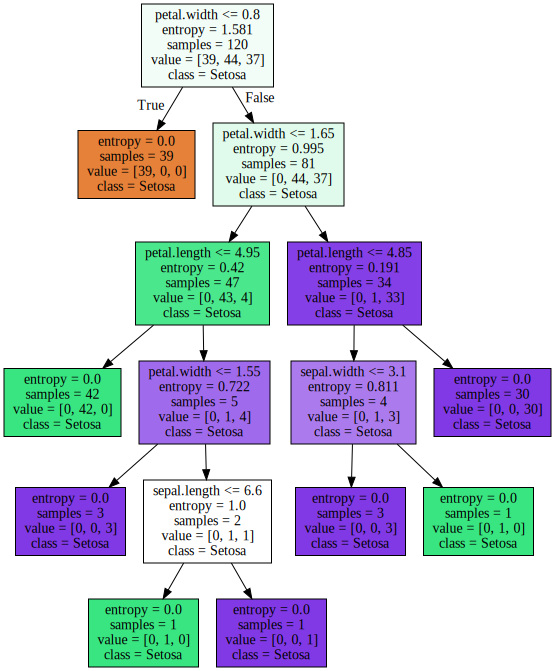

In [ ]:
from graphviz import Source
import cv2
from google.colab.patches import cv2_imshow

dot_data=export_graphviz(dtc, feature_names=df.columns[:-1],class_names=df['variety'],filled=True)
graph = Source(dot_data) 
graph

# Subset Tree

In [ ]:
Xs_train,Xs_test=X_train[:,:2],X_test[:,:2]
Xp_train,Xp_test=X_train[:,2:],X_test[:,2:]

print(Xs_train.shape,Xs_test.shape,Xp_train.shape,Xp_test.shape)

(120, 2) (30, 2) (120, 2) (30, 2)


In [ ]:
dtc=DecisionTreeClassifier(criterion='entropy')
dtc.fit(X_train,Y_train)

dtc_sepal=DecisionTreeClassifier(criterion='entropy')
dtc_sepal.fit(Xs_train,Y_train)

dtc_petal=DecisionTreeClassifier(criterion='entropy')
dtc_petal.fit(Xp_train,Y_train)

print('With entropy criterion')
print("Score with all features : "+ '%.3f' % dtc.score(X_test,Y_test))
print("Score with sepals features : "+ '%.3f' % dtc_sepal.score(Xs_test,Y_test))
print("Score with petals features : "+ '%.3f' % dtc_petal.score(Xp_test,Y_test))

With entropy criterion
Score with all features : 0.967
Score with sepals features : 0.733
Score with petals features : 0.967


In [ ]:
dtcg=DecisionTreeClassifier(criterion='gini')
dtcg.fit(X_train,Y_train)

dtcg_sepal=DecisionTreeClassifier(criterion='gini')
dtcg_sepal.fit(Xs_train,Y_train)

dtcg_petal=DecisionTreeClassifier(criterion='gini')
dtcg_petal.fit(Xp_train,Y_train)

print('With Gini criterion')
print("Score with all features : "+ '%.3f' % dtcg.score(X_test,Y_test))
print("Score with sepals features : "+ '%.3f' % dtcg_sepal.score(Xs_test,Y_test))
print("Score with petals features : "+ '%.3f' % dtcg_petal.score(Xp_test,Y_test))

With Gini criterion
Score with all features : 0.967
Score with sepals features : 0.733
Score with petals features : 0.967


In [ ]:
from sklearn.metrics import confusion_matrix

Yhat_test=dtc.predict(X_test)
confusion_matrix(Y_test,Yhat_test)

array([[11,  0,  0],
       [ 0,  5,  1],
       [ 0,  0, 13]])

# Random Forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier

rfc=RandomForestClassifier(criterion='entropy')
rfc.fit(X_train,Y_train)
print(rfc.score(X_test,Y_test))
print(rfc.feature_importances_)

0.9666666666666667
[0.10817024 0.03049089 0.4360712  0.42526767]


# With MNIST

In [ ]:
from sklearn.datasets import fetch_openml
mnist = fetch_openml('mnist_784')
x = mnist.data
y = mnist.target
print(x.shape,y.shape)

(70000, 784) (70000,)


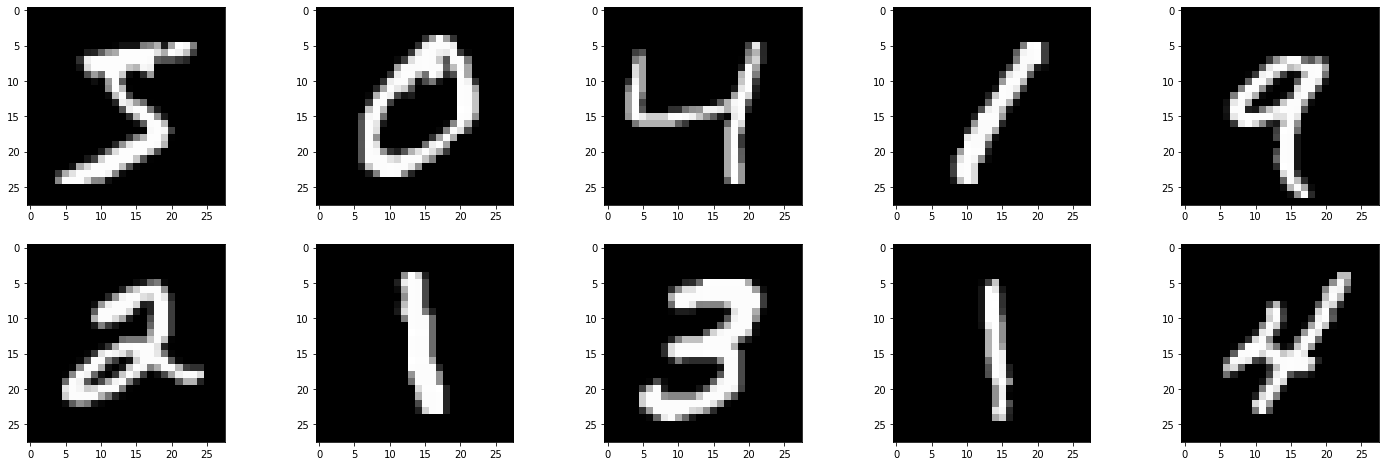

In [ ]:
_,axs=plt.subplots(ncols=5,nrows=2,figsize=(25,8))
for i,ax in enumerate(axs.flatten()):
    plt.sca(ax)
    plt.imshow(np.reshape(x[i],(28,28)),cmap='gray')

In [ ]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=1000)

In [ ]:
dt=DecisionTreeClassifier()
dt.fit(x_train,y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [ ]:
print(dt.score(x_test,y_test))

0.8717857142857143


[[1314    2   23   16    3   16   16   10   12   10]
 [   2 1463   14    5    8    4    9    8   15    7]
 [  22   15 1207   33   18    6   24   27   33   14]
 [   7   14   37 1205   11   68   10   18   33   34]
 [   8    7   12   10 1195   11   21   15   23   62]
 [  12   14    9   70   14 1057   32   10   40   26]
 [  18   12   15    2   16   22 1233    5   28   10]
 [   1   11   33   15   16    6    2 1284   20   46]
 [  18   30   45   39   30   47   22   19 1079   50]
 [   7    4   15   29   67   17    5   40   33 1168]]


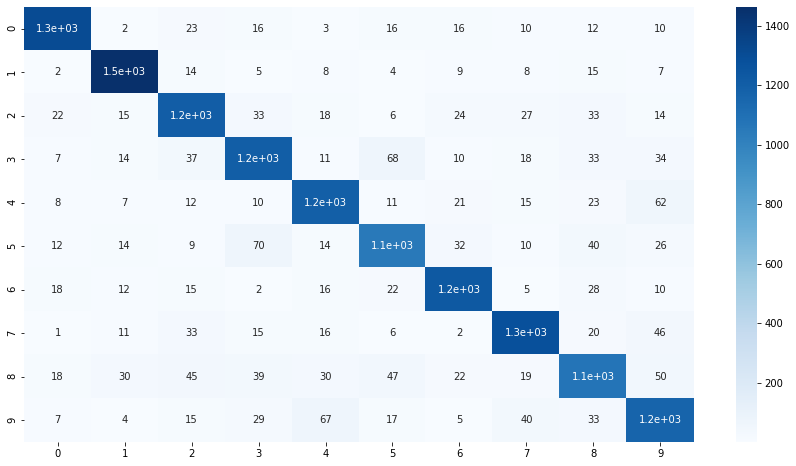

In [ ]:
import seaborn as sbn
yhat=dt.predict(x_test)
cm=confusion_matrix(y_test,yhat)
print(cm)
plt.figure(figsize=(15,8))
sbn.heatmap(cm,cmap='Blues',annot=True,)